Generate  tones in adjacent output channels.  Scan by the bandwidth of the output channel. This produces a "continuous" scan.

With no calibration applied, the variation of amplitude and fast phase evolution with frequency is evident.  

Measure a nominal delay with the function measureNominalDealy and apply it with the function applyDelayCorrection.

Plot the corrected phases.

In [1]:
import importlib
import Mkids
import numpy as np
import matplotlib.pyplot as plt
from MkidsSoc import *
mkidsSoc = MkidsSoc(force_init_clks=False)

outCh = 163


  0%|          | 0/10 [00:00<?, ?it/s]

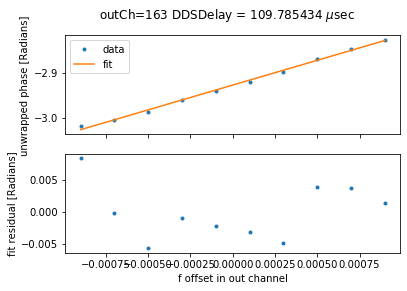

In [2]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)
# Place the mixer so the output frequencies are centered on range of input frequencies
fMixer = mkids.fsIn/2
mkids.setFMixer(fMixer)
# Choose a tone frequency.  Find its output channel.
# Get three frequencies to center on three consecutive output channels.
fTone = fMixer + mkids.fsOut/np.pi + 0.523
outCh = mkids.outFreq2ch(fTone)
fCenter = mkids.outCh2FreqCenter(outCh)
print("outCh =",outCh)
nominalDelay = mkids.measureNominalDelay(outCh, doProgress=True, doPlot=True)

In [3]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)
mtsCorr = mkids.applyDelayCorrection(mts, nominalDelay)

NameError: name 'mts' is not defined

In [ ]:
dfs = mtsCorr['dfs']
fis = mtsCorr['fis'][0]
plt.plot(dfs*1e3,1000*(fis-fis.mean()), ".-")
plt.xlabel("frequency - %f [kHz]"%(fCenter*1000))
plt.ylabel("phase - meanPhase [milliRadians]")

In [ ]:
outChs = np.array([outCh-1, outCh, outCh+1])
print("outChs =",outChs)
toneFreqs = mkids.outCh2FreqCenter(outChs)
toneAmplitudes = np.ones(len(toneFreqs))*0.9/len(toneFreqs)
np.random.seed(12394321)
toneFis = 2* np.pi * np.random.uniform(size=len(toneFreqs))

bandwidth = mkids.fcOut
nMeas = 50
nt = 1
#mkids.setMultiTones(toneFreqs, toneAmplitudes, toneFis, fMixer, verbose=True)
mts3 = mkids.multiToneScan(toneFreqs, toneAmplitudes, toneFis, 
                    bandwidth, nMeas, fMixer, nt, verbose=False, doProgress=True)


In [ ]:
mts3Corr = mkids.applyDelayCorrection(mts3, nominalDelay)

In [ ]:
freqs, amps, fis = mkids.mtsUnwind(mts3Corr)
plt.plot(freqs, fis, "-o")
plt.xlabel("frequency (MHz)")
plt.ylabel("phase corrected for delay")